In [32]:
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [15]:
stemmer = SnowballStemmer("english")
df = pd.read_csv('clerkie_questions.csv', names = ["class","sentence"])
training_data = df[['sentence']].values

In [16]:
#training_data = np.concatenate((y_train, X_train), axis=1)
words = []
documents = []
ignore_words = set(stopwords.words('english'))
ignore_words.add('?')
for pattern in training_data:
    # tokenize each word in the sentence
    w = nltk.word_tokenize(pattern[0])
    # add to words list
    words.extend(w)
    # add to documents in corpus
    documents.append(w)
# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words and not w[0].isdigit()]
words = list(set(words))


In [17]:
# create our training data
training = []
for doc in documents:
    # initialize our bag of words(bow) for each document in the list
    bow = []
    # list of tokenized words for the pattern
    token_words = doc[0]
    # stem each word
    token_words = [stemmer.stem(word.lower()) for word in token_words]
    # create our bag of words array
    for w in words:
        bow.append(1) if w in token_words else bow.append(0)

    # our training set will contain a the bag of words model and the output row that tells
    # which catefory that bow belongs to.
    training.append(bow)

# shuffle our features and turn into np.array as tensorflow  takes in numpy array

training = np.array(training)

In [18]:
ms = MeanShift()
ms.fit(training)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [28]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))
# print(cluster_centers)
print(n_clusters)
print(labels)

4
[1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 3 1 0 1 2 0 2 1 0 1 1 1 0 1
 1 1 0 1 1 0 3 1 0 2 1 2 0 2 2 0 0 1 1 2 1 0 2 2 2 0 0 2 0 0 0 0 2 2 1 1 0
 1 0 0 2 0 0 0 0 1 1 1 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 2 1 1 0 2 1
 0 1 1 1 1 2 1 0 1]


In [33]:
data = training

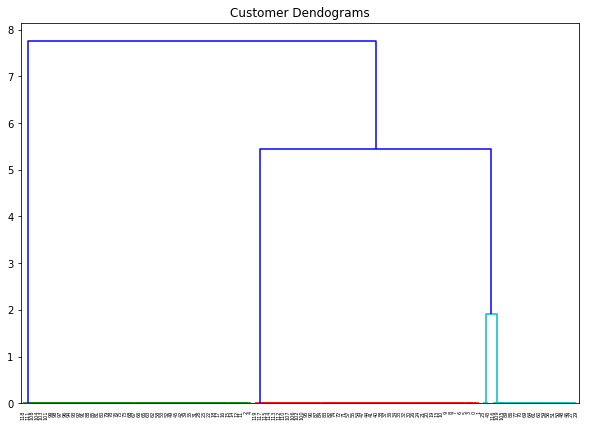

In [34]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

In [56]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(data)
pred = np.expand_dims(pred, axis=1)

In [64]:
labeled_data = np.concatenate((pred,training_data), axis=1)

In [68]:
np.savetxt("Clustered_data_with_label.csv", labeled_data, fmt='%0s', delimiter=",")